In [108]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

%matplotlib inline

### Load Data

In [109]:
train_images_dir = 'day_night_images/training'
test_images_dir = 'day_night_images/test'

In [110]:
def load_data(directory):
    file_path = os.listdir(directory)
    IMAGE_LIST=[]
    for each in file_path:
        if each == 'day':
            label=0
        else: label=1
        
        image_path = os.path.join(directory,each)
        
        for file in os.listdir(image_path):
            image_location = os.path.join(image_path,file)
            img = cv2.imread(image_location)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            IMAGE_LIST.append([img,label])
            
    return IMAGE_LIST



In [111]:
train_image_list = load_data(train_images_dir)
test_image_list = load_data(test_images_dir)

print('Total Images is train set: ',len(train_image_list))
print('Total Images is test set: ',len(test_image_list))

Total Images is train set:  240
Total Images is test set:  160


* Now we have 2 separate lists for train and test data.
* Each train and test list consists of sub-lists storing image as numpy array at 0 index and corresponding label at 1st index. 

In [112]:
train_image_list[0][0]  #image as numpy array
train_image_list[0][1]  #image label

0

Text(0.5, 1.05, '1')

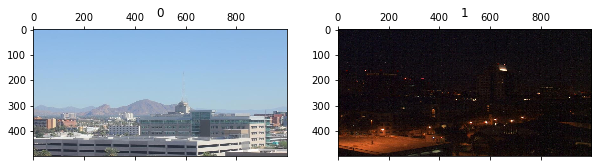

In [123]:
day_image = train_image_list[12][0]
day_label = train_image_list[12][1]

night_image = train_image_list[130][0]
night_label = train_image_list[130][1]

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,10))
ax1.matshow(day_image)
ax1.set_title(day_label)
ax2.matshow(night_image)
ax2.set_title(night_label)

Since the images are of different sizes therefore we need to standardize our data by making them of same size.

### Standardizing Data

In [114]:
for data in train_image_list:
    
    img = data[0]
    data[0] = cv2.resize(img,(1000,500))
    
for data in test_image_list:
    
    img = data[0]
    data[0] = cv2.resize(img,(1000,550))

Plotting images after resizing

Text(0.5, 1.05, '1')

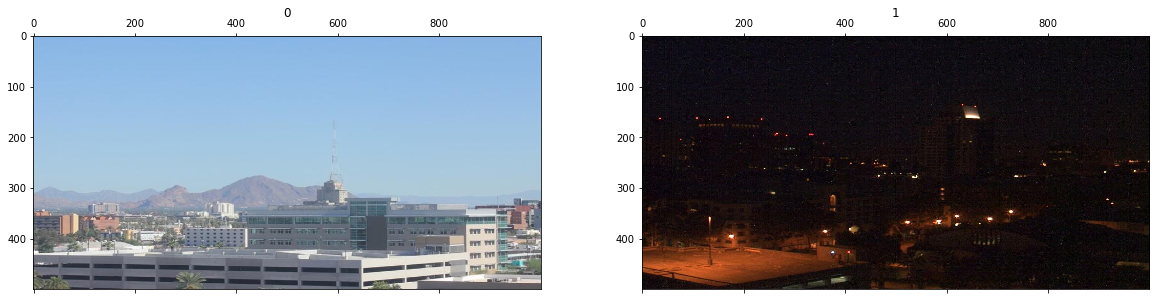

In [115]:
day_image = train_image_list[12][0]
day_label = train_image_list[12][1]

night_image = train_image_list[130][0]
night_label = train_image_list[130][1]

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.matshow(day_image)
ax1.set_title(day_label)
ax2.matshow(night_image)
ax2.set_title(night_label)

We will be differentiating between the day-night images on the basis of brightness of the particular image

The value of 'V' in HSV channel denotes the brightness of each pixel in an image.

Text(0.5, 1.0, 'V channel')

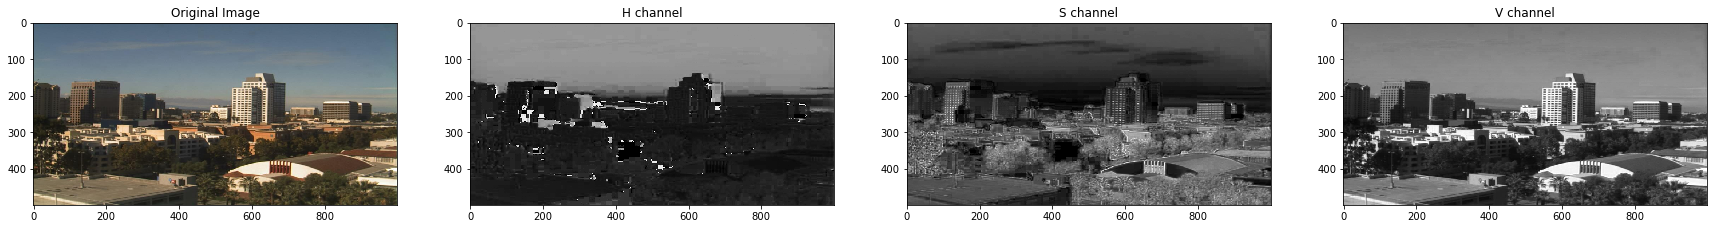

In [116]:
sample_img = train_image_list[20][0]
hsv_img = cv2.cvtColor(sample_img,cv2.COLOR_RGB2HSV)

fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(30,15))

h = hsv_img[:,:,0]
s = hsv_img[:,:,1]
v = hsv_img[:,:,2]

ax1.imshow(sample_img)
ax1.set_title('Original Image')

ax2.imshow(h,cmap='gray')
ax2.set_title('H channel')

ax3.imshow(s,cmap='gray')
ax3.set_title('S channel')

ax4.imshow(v,cmap='gray')
ax4.set_title('V channel')

### Calculate Average Brightness



In [117]:
def avg_brightness(rgb_img):
    
    img_hsv = cv2.cvtColor(rgb_img,cv2.COLOR_RGB2HSV)
    
    total_brightness = np.sum(img_hsv[:,:,2])
    
    img_area = 1000*550
    
    avg_brightness = (total_brightness/img_area).round(2)
    
    return avg_brightness
    

### Our Classifier

In [118]:
def predict_label(rgb_image):
    
    avg = avg_brightness(rgb_image)
    
    predicted_label= 0
    threshold=105
    
    if avg < threshold:
        predicted_label = 1
        
    return predicted_label
    

### Accuracy on train data

In [119]:
pred=[]
actual=[]
for data in train_image_list:
    pred.append(predict_label(data[0]))
    actual.append(data[1])


In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score
display(accuracy_score(actual,pred)*100)
confusion_matrix(actual,pred)

86.25

array([[ 88,  32],
       [  1, 119]], dtype=int64)

### Accuracy on test data

In [121]:
pred=[]
actual=[]
for data in test_image_list:
    pred.append(predict_label(data[0]))
    actual.append(data[1])

In [122]:
display(accuracy_score(actual,pred)*100)
confusion_matrix(actual,pred)

91.25

array([[74,  6],
       [ 8, 72]], dtype=int64)